<a href="https://colab.research.google.com/github/fridymandita/Pengolahan-Citra-Digital/blob/main/PCD__Color_Adjustment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install kornia

In [2]:
%%capture
!wget https://github.com/kornia/data/raw/main/ninja_turtles.jpg

In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

import torch
import torchvision
import kornia as K

In [4]:
def imshow(input: torch.Tensor):
    out: torch.Tensor = torchvision.utils.make_grid(input, nrow=2, padding=5)
    out_np: np.ndarray = K.utils.tensor_to_image(out)
    plt.imshow(out_np)
    plt.axis('off')
    plt.show()

We use OpenCV to load an image to memory represented in a numpy.ndarray

In [5]:
img_bgr: np.ndarray = cv2.imread('ninja_turtles.jpg', cv2.IMREAD_COLOR)

Convert the numpy array to torch

In [6]:
x_bgr: torch.Tensor = K.utils.image_to_tensor(img_bgr)
x_rgb: torch.Tensor = K.color.bgr_to_rgb(x_bgr)

Create batch and normalize

In [7]:
x_rgb = x_rgb.expand(4, -1, -1, -1)  # 4xCxHxW
x_rgb = x_rgb.float() / 255.0

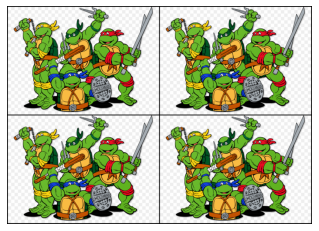

In [8]:
imshow(x_rgb)

## Adjust brightness

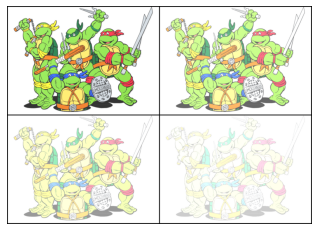

In [9]:
x_out: torch.Tensor = K.enhance.adjust_brightness(
    x_rgb, torch.linspace(0.2, 0.8, 4))
imshow(x_out)

## Adjust Contrast

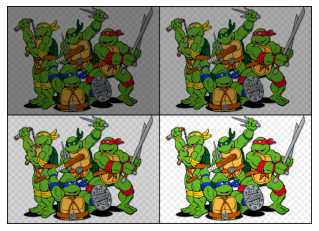

In [10]:
x_out: torch.Tensor = K.enhance.adjust_contrast(
    x_rgb, torch.linspace(0.5, 1., 4))
imshow(x_out)

## Adjust Saturation

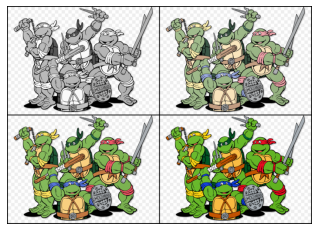

In [11]:
x_out: torch.Tensor = K.enhance.adjust_saturation(
    x_rgb, torch.linspace(0., 1., 4))
imshow(x_out)

## Adjust Gamma

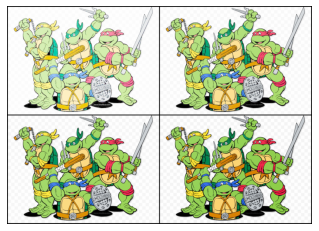

In [12]:
x_out: torch.Tensor = K.enhance.adjust_gamma(
    x_rgb, torch.tensor([0.2, 0.4, 0.5, 0.6]))
imshow(x_out)

## Adjust Hue

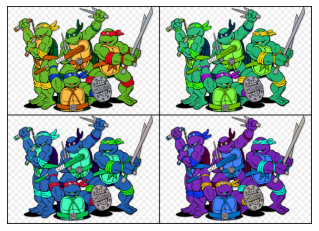

In [13]:
x_out: torch.Tensor = K.enhance.adjust_hue(
    x_rgb, torch.linspace(0., 3.14159, 4))
imshow(x_out)